In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage.color import rgb2gray
from scipy.signal import correlate2d, convolve2d

In [2]:
woman = imageio.imread("woman.png")

In [3]:
woman_dft = np.fft.fft2(woman)

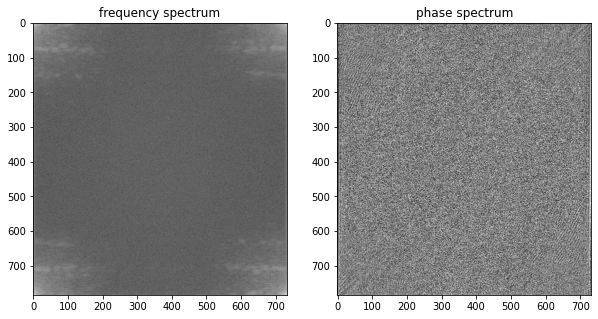

In [4]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(np.log(np.abs(woman_dft)),cmap="gray")
ax.set_title("frequency spectrum")
ax2.imshow(np.angle(woman_dft),cmap="gray")
ax2.set_title("phase spectrum")

plt.show()

In [5]:
def Fuv(freq, phase):
    return(np.real(np.fft.ifft2(np.multiply(freq, phase))))

In [6]:
a = Fuv(np.abs(woman_dft), np.exp(1j*np.angle(woman_dft)))

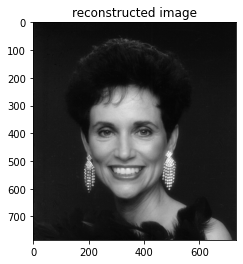

In [7]:
plt.imshow(a, cmap="gray")
plt.title("reconstructed image")
plt.show()

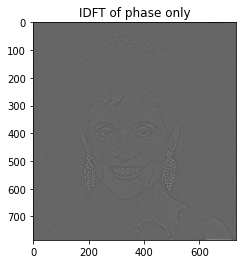

In [8]:
plt.imshow(Fuv(1, np.exp(1j*np.angle(woman_dft))), cmap='gray')
plt.title("IDFT of phase only")
plt.show()

In [9]:
woman_fftshit = np.fft.fftshift(woman_dft)

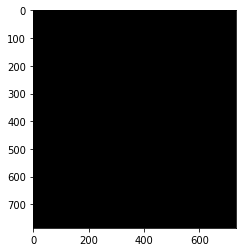

In [10]:
plt.imshow(Fuv(np.abs(woman_fftshit),0), cmap='gray')

Rotate image

In [11]:
rot_img = np.rot90(woman)
rot_img = np.rot90(rot_img)

In [12]:
rot_dft = np.fft.fft2(rot_img)

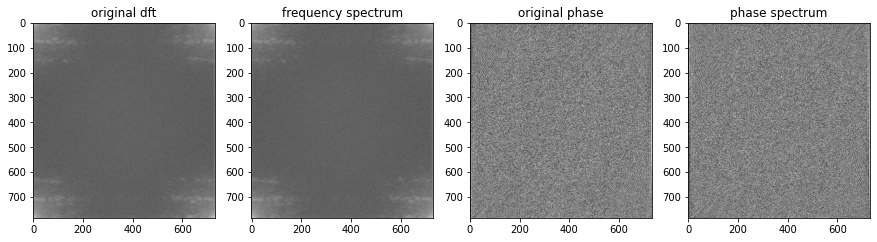

In [13]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(141)
ax2 = f.add_subplot(142)
ax3 = f.add_subplot(143)
ax4 = f.add_subplot(144)

ax.imshow(np.log(np.abs(woman_dft)),cmap="gray")
ax.set_title("original dft")
ax2.imshow(np.log(np.abs(rot_dft)),cmap="gray")
ax2.set_title("frequency spectrum")
ax3.imshow(np.angle(woman_dft),cmap="gray")
ax3.set_title("original phase")
ax4.imshow(np.angle(rot_dft),cmap="gray")
ax4.set_title("phase spectrum")

plt.show()

Frequency seems same after rotation but phase is different

In [14]:
saturn = imageio.imread("saturn.tif")

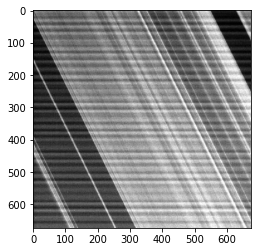

In [15]:
plt.imshow(saturn,cmap="gray")

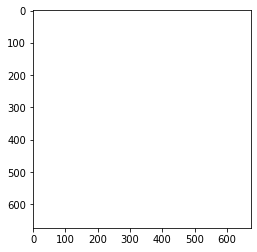

In [16]:
filtr = np.ones([saturn.shape[0],saturn.shape[1]], dtype=np.uint8) * 255
filtr = filtr.astype('uint8')
plt.imshow(filtr, cmap='gray', vmin=0, vmax=255)
           

In [17]:
saturn_dft = np.fft.fft2(saturn)

In [18]:
saturn_shiftdft = np.fft.fftshift(saturn_dft)

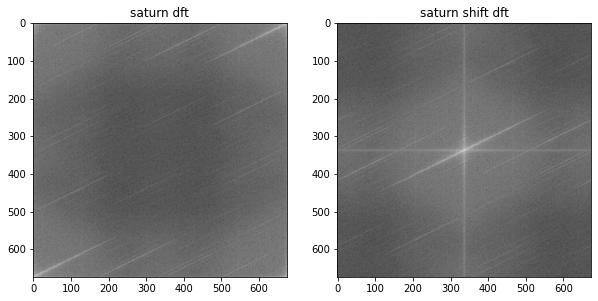

In [19]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(np.log(np.abs(saturn_dft)),cmap="gray")
ax.set_title("saturn dft")
ax2.imshow(np.log(np.abs(saturn_shiftdft)),cmap="gray")
ax2.set_title("saturn shift dft")

plt.show()

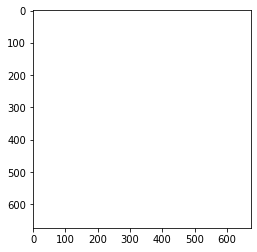

In [20]:
plt.imshow(filtr,cmap="gray",vmin=0, vmax=255)

In [21]:
mid_pixel = int(saturn.shape[0]/2)

In [22]:
for i in range(saturn.shape[0]):
    if i <= mid_pixel - 5 or i > mid_pixel + 5:
        filtr[i][mid_pixel] = 0

In [23]:
filtr = np.where(filtr==255,1,filtr)

In [24]:
saturn_filtr = np.real(saturn_shiftdft) * filtr

/home/student/ankit/Jupyter/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


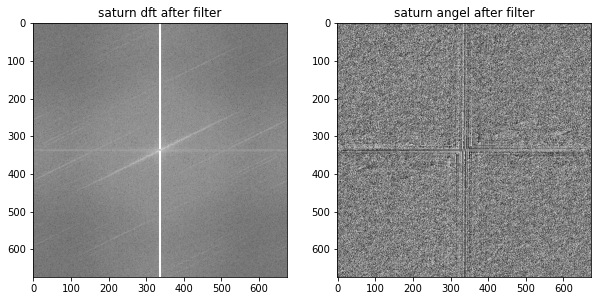

In [25]:
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.imshow(np.log(np.abs(saturn_filtr)),cmap="gray")
ax.set_title("saturn dft after filter")
ax2.imshow(np.angle(saturn_shiftdft),cmap="gray")
ax2.set_title("saturn angel after filter")

plt.show()

In [26]:
saturn_ifft = np.real(np.fft.ifft2(np.fft.ifftshift(saturn_filtr)))

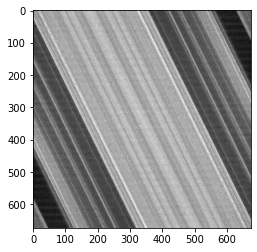

In [27]:
plt.imshow(saturn_ifft, cmap='gray')

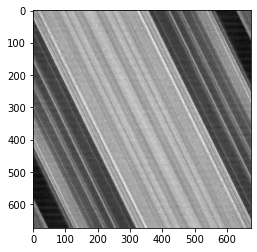

In [28]:
hr_filtr = np.ones([saturn.shape[0],saturn.shape[1]], dtype=np.uint8) * 255
hr_filtr = filtr.astype('uint8')
for i in range(saturn.shape[0]):
    if i <= mid_pixel - 5 or i > mid_pixel + 5:
        hr_filtr[mid_pixel][i] = 0
        
hr_filtr = np.where(hr_filtr==255,1,hr_filtr)
saturn_hr_filtr = np.real(saturn_shiftdft) * hr_filtr
saturn_hr_ifft = np.real(np.fft.ifft2(np.fft.ifftshift(saturn_hr_filtr)))
plt.imshow(saturn_hr_ifft, cmap='gray')

In [29]:
from skimage.feature import canny

In [30]:
dog = imageio.imread('MaruTaro.jpg')
dog = rgb2gray(dog)

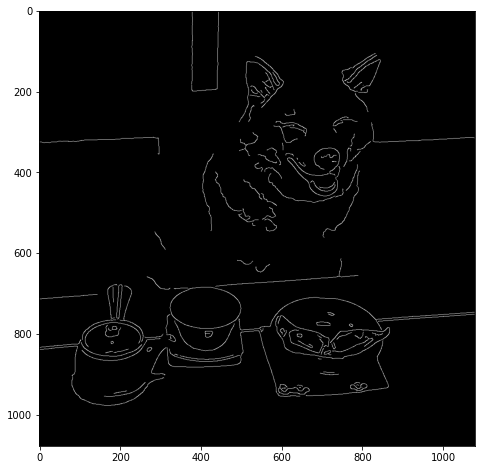

In [40]:
edge_canny = canny(dog, sigma=2.3)
plt.figure(figsize=(12,8))
plt.imshow(edge_canny, cmap='gray')